In [1]:
%pylab inline
import mdtraj as md
import pandas as pd
rc('font', family='serif', size=20)

Populating the interactive namespace from numpy and matplotlib


In [2]:
temps = ('300','373','423','473','523','573','623')
print len(temps)

7


In [3]:
h_u_top = md.load('/home/gerry/heat/structures/H-unbound.pdb')
h_l_top = md.load('/home/gerry/heat/structures/H-bound.pdb')

r2_u_top = md.load('/home/gerry/heat/structures/r2-unbound.pdb')
r2_l_top = md.load('/home/gerry/heat/structures/r2_bound.pdb')

mean 0.381522 at 300
mean 0.455532 at 373
mean 0.506138 at 423
mean 0.664204 at 473
mean 0.693908 at 523
mean 0.803381 at 573
mean 1.225480 at 623


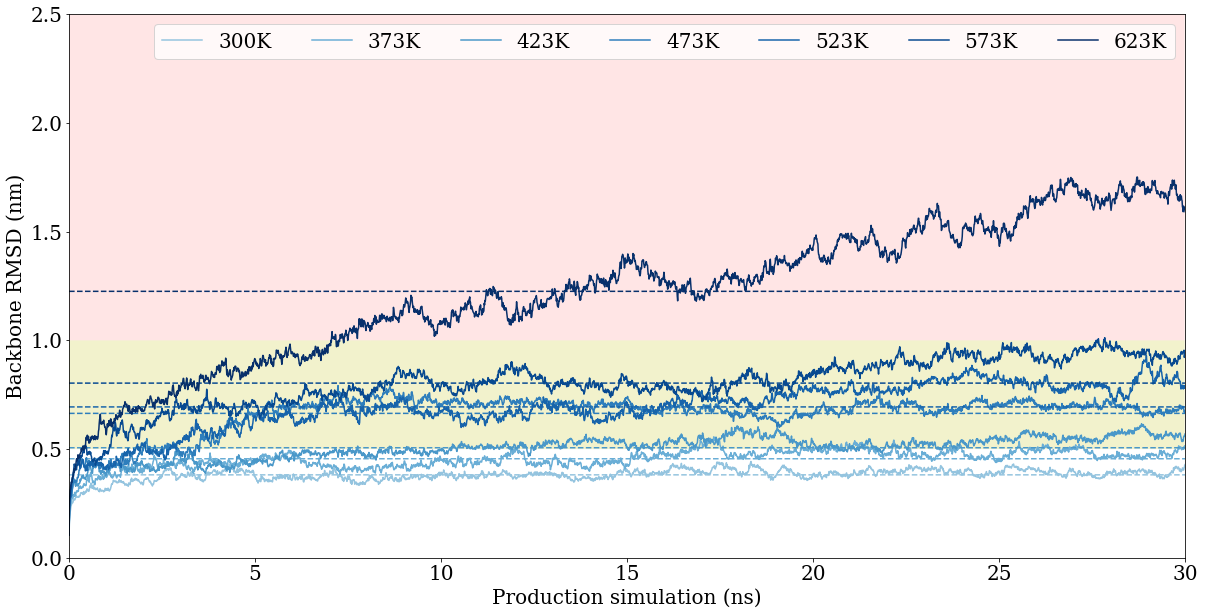

In [4]:
h_unbound_to_u = pd.DataFrame()
h_unbound_to_u_all = pd.DataFrame()

figure(figsize=(20,10))
colors = iter(cm.Blues(np.linspace(0.4, 1, len(temps))))
for t in temps:
    c = next(colors)
    traj = md.load_xtc('pro/H_unbound/H_unbound_pro_'+t+'k.xtc', top=h_u_top)
    rmsd = md.rmsd(traj, h_u_top)
    h_unbound_to_u_all = h_unbound_to_u_all.append(pd.Series(rmsd), ignore_index=True)
    try:
        traj = md.load_xtc('pro/H_unbound/H_unbound_pro_'+t+'k1.xtc', top=h_u_top)
        rmsd1 = md.rmsd(traj, h_u_top)
        h_unbound_to_u_all = h_unbound_to_u_all.append(pd.Series(rmsd1), ignore_index=True)
    except IOError:
        pass
    else:
        rmsd = (rmsd+rmsd1)/2
        
    try:
        traj = md.load_xtc('pro/H_unbound/H_unbound_pro_'+t+'k2.xtc', top=h_u_top)
        rmsd2 = md.rmsd(traj, h_u_top)
        h_unbound_to_u_all = h_unbound_to_u_all.append(pd.Series(rmsd2), ignore_index=True)
    except IOError:
        pass
    else:
        rmsd = (rmsd+rmsd2)/2
        plot(rmsd, color=c, label=t+'K')
    
    h_unbound_to_u = h_unbound_to_u.append(pd.Series(rmsd), ignore_index=True)
    x = np.arange(0,len(rmsd))
    plot(x, [mean(rmsd) for i in x], color=c, linestyle='--')
    print ('mean %f at '+t) % mean(rmsd)

legend(ncol=len(temps))
xlim(0,3000)
xticks(range(0,3001,500),range(0,31,5))
xlabel('Production simulation (ns)')
yticks(arange(0,2.6,0.5))
ylim(0,2.5)
ylabel('Backbone RMSD (nm)')

fill_between(range(0,3000), 0.5, 1, facecolor='y', interpolate=True, alpha=0.2)
fill_between(range(0,3000), 1, 2.5, facecolor='r', interpolate=True, alpha=0.1)

h_unbound_to_u_all.to_csv('rmsd/h_unbound_to_u.csv', index=False)
savefig('fig_src/rmsd_H.png', format='png', dpi=600, bbox_inches="tight")

mean 0.421837 at 300
mean 0.616465 at 373
mean 0.537169 at 423
mean 0.702324 at 473
mean 0.687352 at 523
mean 0.885945 at 573
mean 1.535506 at 623


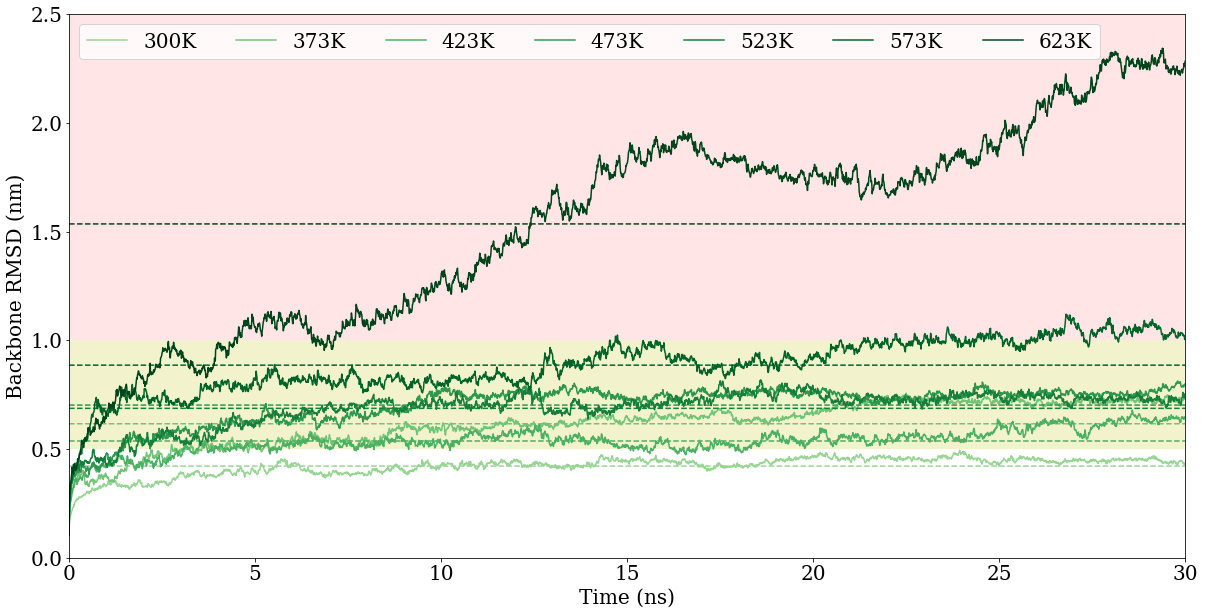

In [5]:
r2_unbound_to_u = pd.DataFrame()
r2_unbound_to_u_all = pd.DataFrame()

figure(figsize=(20,10))
colors = iter(cm.Greens(np.linspace(0.4, 1, len(temps))))
for t in temps:
    c = next(colors)
    traj = md.load_xtc('pro/R2_unbound/R2_unbound_pro_'+t+'k.xtc', top=r2_u_top)
    rmsd = md.rmsd(traj, r2_u_top)
    r2_unbound_to_u_all = r2_unbound_to_u_all.append(pd.Series(rmsd), ignore_index=True)
    try:
        traj = md.load_xtc('pro/R2_unbound/R2_unbound_pro_'+t+'k1.xtc', top=r2_u_top)
        rmsd1 = md.rmsd(traj, r2_u_top)
        r2_unbound_to_u_all = r2_unbound_to_u_all.append(pd.Series(rmsd1), ignore_index=True)
    except IOError:
        pass
    else:
        rmsd = (rmsd+rmsd1)/2
        
    try:
        traj = md.load_xtc('pro/R2_unbound/R2_unbound_pro_'+t+'k2.xtc', top=r2_u_top)
        rmsd2 = md.rmsd(traj, r2_u_top)
        r2_unbound_to_u_all = r2_unbound_to_u_all.append(pd.Series(rmsd2), ignore_index=True)
    except IOError:
        pass
    else:
        rmsd = (rmsd+rmsd2)/2
        plot(rmsd, color=c, label=t+'K')

    r2_unbound_to_u = r2_unbound_to_u.append(pd.Series(rmsd), ignore_index=True)
    x = np.arange(0,len(rmsd))
    plot(x, [mean(rmsd) for i in x], color=c, linestyle='--')
    print ('mean %f at '+t) % mean(rmsd)

legend(ncol=len(temps))
xlim(0,3000)
xticks(range(0,3001,500),range(0,31,5))
xlabel('Time (ns)')
yticks(arange(0,2.6,0.5))
ylim(0,2.5)
ylabel('Backbone RMSD (nm)')

fill_between(range(0,3000), 0.5, 1, facecolor='y', interpolate=True, alpha=0.2)
fill_between(range(0,3000), 1, 2.5, facecolor='r', interpolate=True, alpha=0.1)

r2_unbound_to_u_all.to_csv('rmsd/r2_unbound_to_u.csv', index=False)
savefig('fig_src/rmsd_R2.png', format='png', dpi=600, bbox_inches="tight")

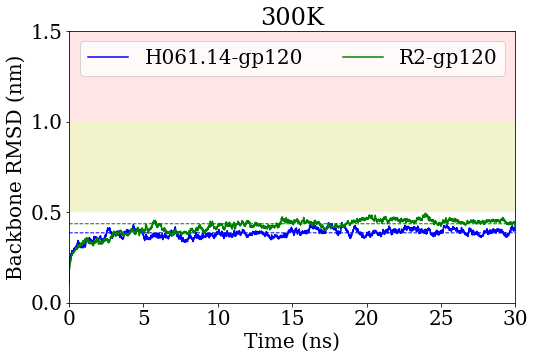

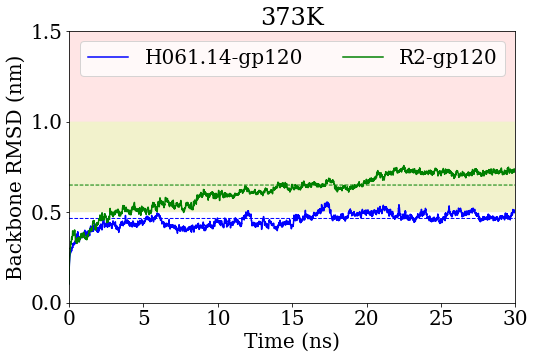

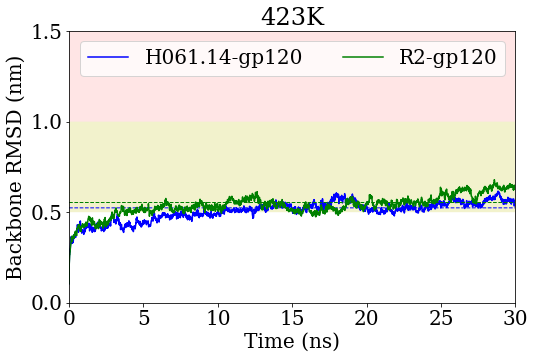

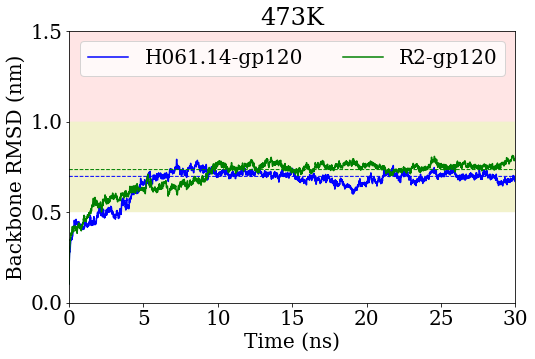

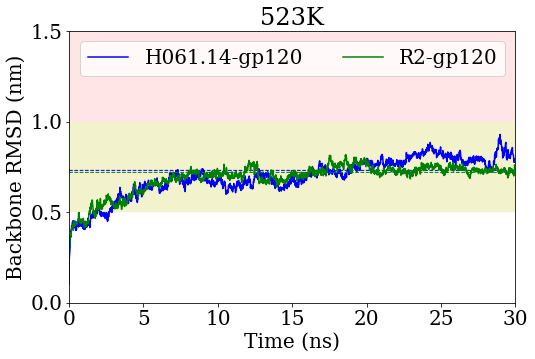

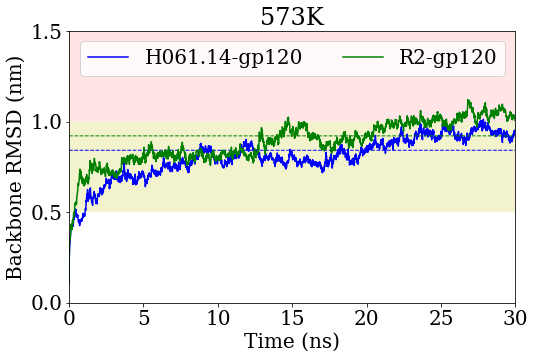

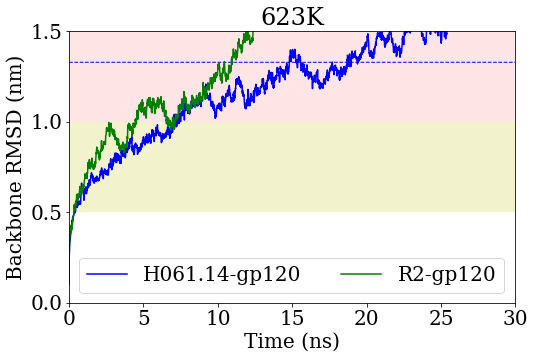

In [27]:
x = np.arange(0,3001)
mean_h = []
mean_r2 = []
var_h = []
var_r2 = []

for i,t in enumerate(temps):
    figure(figsize=(8,5))
    plot(h_unbound_to_u.iloc[i], 'b', label='H061.14-gp120')
    mean = h_unbound_to_u.iloc[i][500:].mean()
    plot(x, [mean for xi in x], color='b', linestyle='--', linewidth=1)
    mean_h.append(mean)
    var_h.append(h_unbound_to_u.iloc[i][500:].var())

    plot(r2_unbound_to_u.iloc[i], 'g', label='R2-gp120')
    mean = r2_unbound_to_u.iloc[i][500:].mean()
    plot(x, [mean for xi in x], color='g', linestyle='--', linewidth=1)
    mean_r2.append(mean)
    var_r2.append(r2_unbound_to_u.iloc[i][500:].var())

    legend(ncol=2)
    title(t+'K')
    xlim(0,3000)
    xticks(range(0,3001,500),range(0,31,5))
    xlabel('Time (ns)')
    yticks(arange(0,1.6,0.5))
    ylim(0,1.5)
    ylabel('Backbone RMSD (nm)')

    fill_between(range(0,3000), 0.5, 1, facecolor='y', interpolate=True, alpha=0.2)
    fill_between(range(0,3000), 1, 2.5, facecolor='r', interpolate=True, alpha=0.1)
    
    if t in ['300','373', '473', '573']:
        savefig('fig_src/rmsd_'+t+'.png', format='png', dpi=600, bbox_inches="tight")

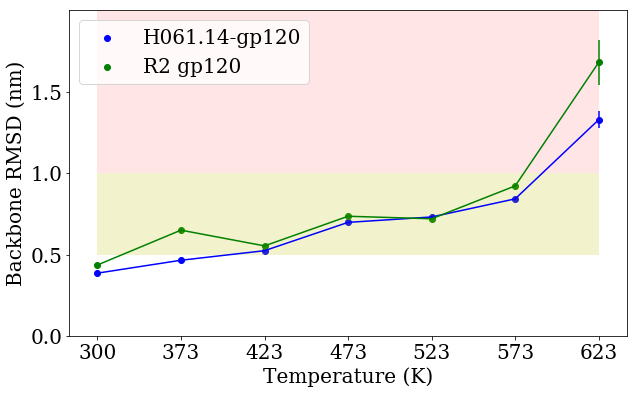

In [33]:
figure(figsize=(10,6))
x = range(0,len(temps))
scatter(x,mean_h, color='b', linewidth=1, label='H061.14-gp120')
errorbar(x,mean_h, yerr=var_h, color='b')
scatter(x,mean_r2, color='g', linewidth=1, label='R2 gp120')
errorbar(x,mean_r2, yerr=var_r2, color='g')

fill_between(x, 0.5, 1, facecolor='y', interpolate=True, alpha=0.2)
fill_between(x, 1, 2, facecolor='r', interpolate=True, alpha=0.1)
    
xticks(x,temps)
xlabel('Temperature (K)')
yticks(arange(0,2,0.5))
ylim(0,2)
ylabel('Backbone RMSD (nm)')
legend()

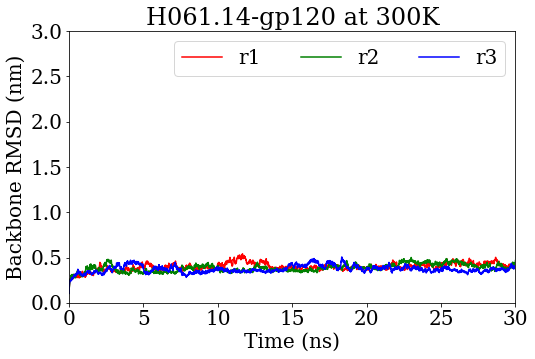

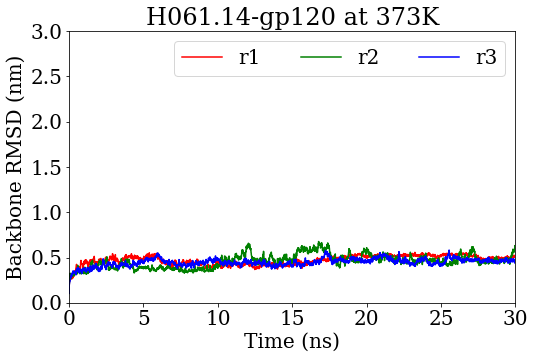

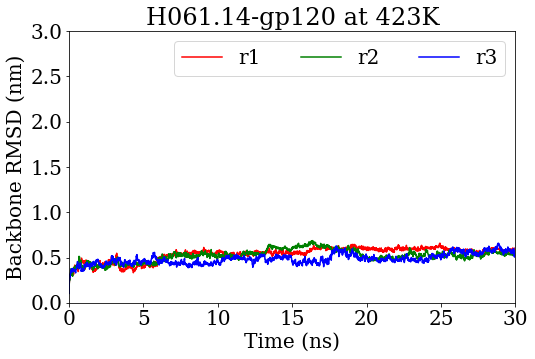

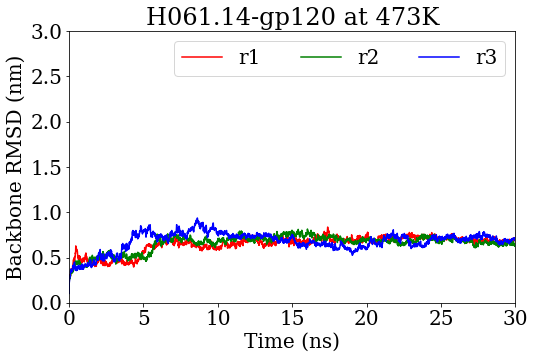

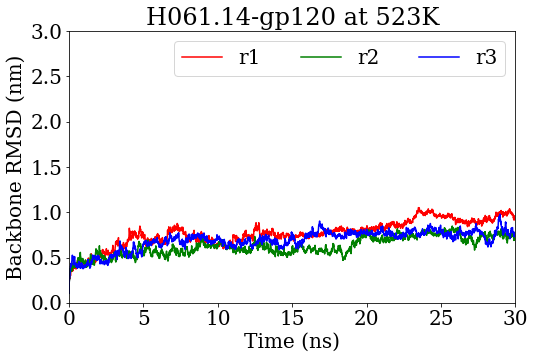

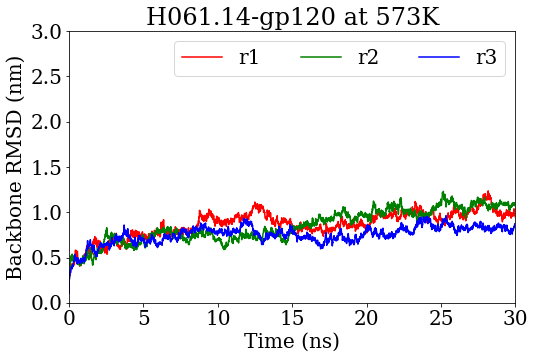

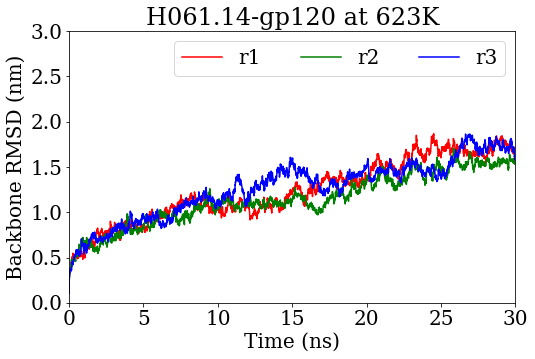

In [38]:
for t in temps:
    figure(figsize=(8,5))
    traj = md.load_xtc('pro/H_unbound/H_unbound_pro_'+t+'k.xtc', top=h_u_top)
    rmsd = md.rmsd(traj, h_u_top)
    plot(rmsd, color='r', label='r1')
    try:
        traj = md.load_xtc('pro/H_unbound/H_unbound_pro_'+t+'k1.xtc', top=h_u_top)
        rmsd1 = md.rmsd(traj, h_u_top)
    except IOError:
        pass
    else:
        plot(rmsd1, color='g', label='r2')
        
    try:
        traj = md.load_xtc('pro/H_unbound/H_unbound_pro_'+t+'k2.xtc', top=h_u_top)
        rmsd2 = md.rmsd(traj, h_u_top)
    except IOError:
        pass
    else:
        plot(rmsd2, color='b', label='r3')
    legend(ncol=3)
    title('H061.14-gp120 at ' + t + 'K')
    xlim(0,3000)
    xticks(range(0,3001,500),range(0,31,5))
    xlabel('Time (ns)')
    yticks(arange(0,3.1,0.5))
    ylim(0,3)
    ylabel('Backbone RMSD (nm)')
    
    savefig('fig_src/H_rmsd/H_rmsd_'+t+'.png', format='png', dpi=600, bbox_inches="tight")

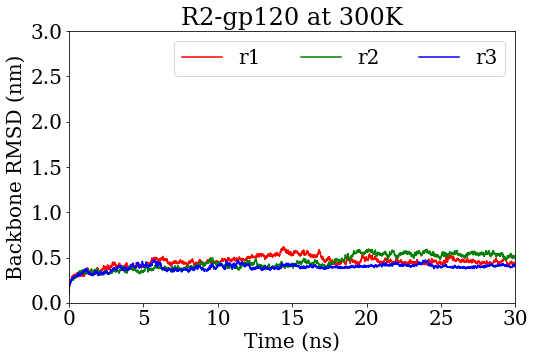

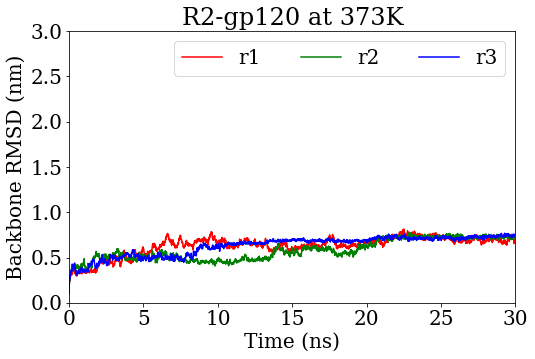

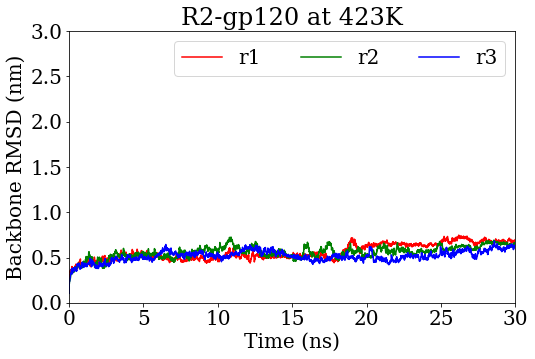

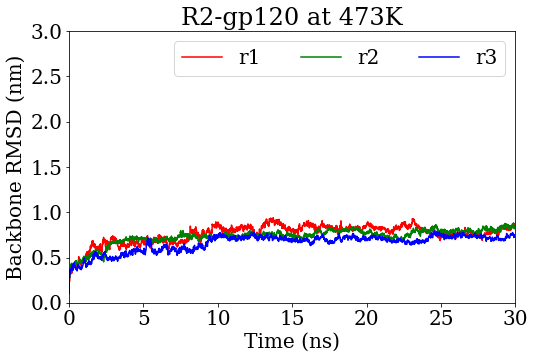

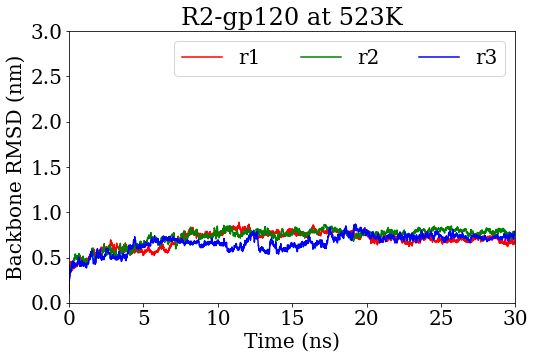

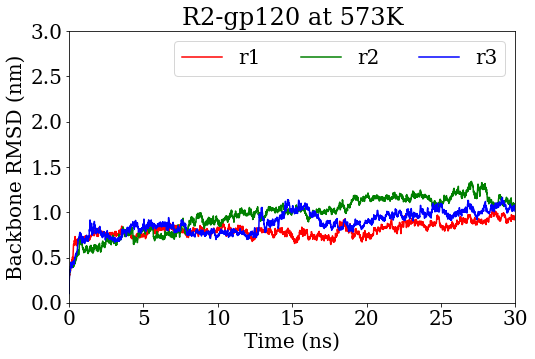

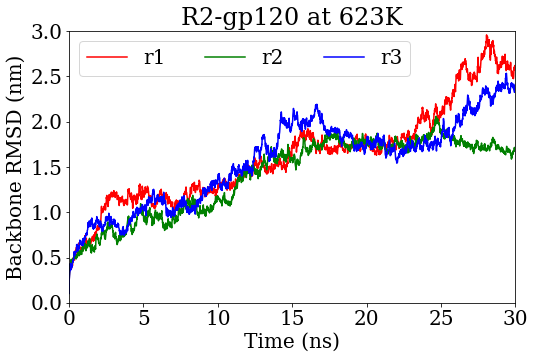

In [39]:
for t in temps:
    figure(figsize=(8,5))
    traj = md.load_xtc('pro/R2_unbound/R2_unbound_pro_'+t+'k.xtc', top=r2_u_top)
    rmsd = md.rmsd(traj, r2_u_top)
    plot(rmsd, color='r', label='r1')
    try:
        traj = md.load_xtc('pro/R2_unbound/R2_unbound_pro_'+t+'k1.xtc', top=r2_u_top)
        rmsd1 = md.rmsd(traj, r2_u_top)
    except IOError:
        pass
    else:
        plot(rmsd1, color='g', label='r2')
        
    try:
        traj = md.load_xtc('pro/R2_unbound/R2_unbound_pro_'+t+'k2.xtc', top=r2_u_top)
        rmsd2 = md.rmsd(traj, r2_u_top)
    except IOError:
        pass
    else:
        plot(rmsd2, color='b', label='r3')
    legend(ncol=3)
    title('R2-gp120 at ' + t + 'K')
    xlim(0,3000)
    xticks(range(0,3001,500),range(0,31,5))
    xlabel('Time (ns)')
    yticks(arange(0,3.1,0.5))
    ylim(0,3)
    ylabel('Backbone RMSD (nm)')
    
    savefig('fig_src/R2_rmsd/R2_rmsd_'+t+'.png', format='png', dpi=600, bbox_inches="tight")

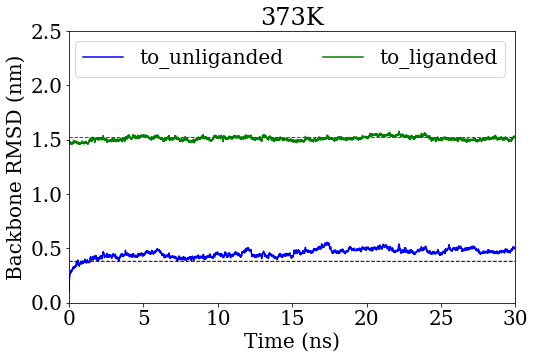

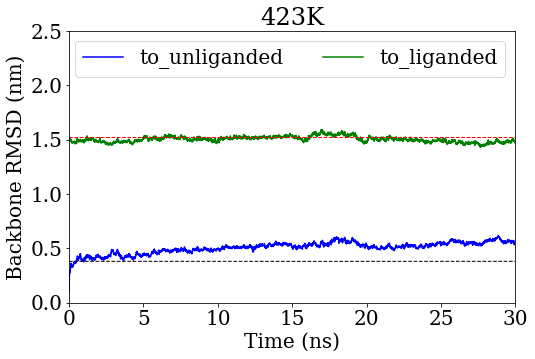

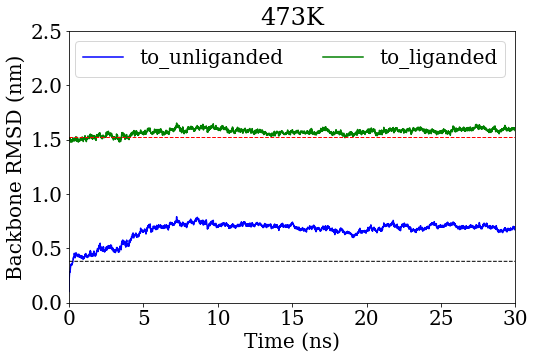

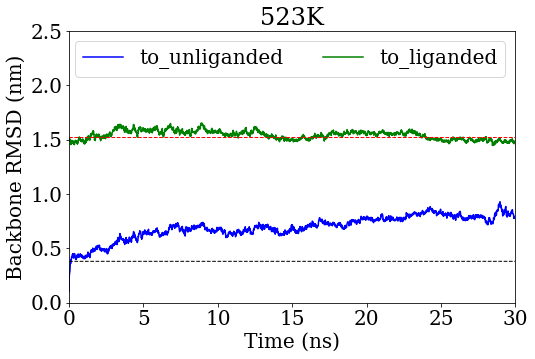

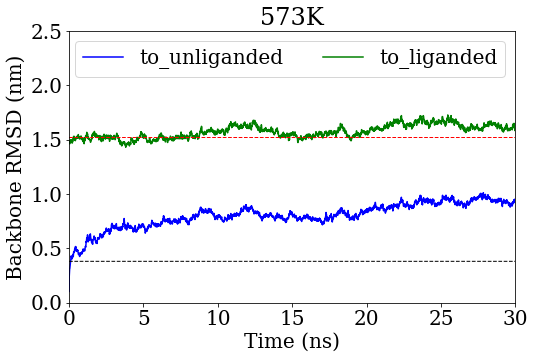

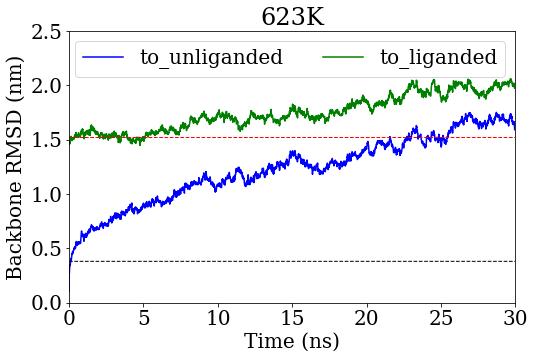

In [11]:
x = np.arange(0,3001)

mean_un = 0
mean_li = 0

for i,t in enumerate(temps):
    if t == '300':        
        traj = md.load_xtc('pro/H_unbound/H_unbound_pro_'+t+'k.xtc', top=h_u_top)
        rmsd = md.rmsd(traj, h_l_top)
        traj = md.load_xtc('pro/H_unbound/H_unbound_pro_'+t+'k1.xtc', top=h_u_top)
        rmsd1 = md.rmsd(traj, h_l_top)      
        rmsd = (rmsd+rmsd1)/2

        traj = md.load_xtc('pro/H_unbound/H_unbound_pro_'+t+'k2.xtc', top=h_u_top)
        rmsd2 = md.rmsd(traj, h_l_top)       
        rmsd = (rmsd+rmsd2)/2
        
        mean_un = mean(h_unbound_to_u.iloc[i])
        mean_li = mean(rmsd)
        
    else:        
        figure(figsize=(8,5))
        plot(h_unbound_to_u.iloc[i], 'b', label='to_unliganded')

        traj = md.load_xtc('pro/H_unbound/H_unbound_pro_'+t+'k.xtc', top=h_u_top)
        rmsd = md.rmsd(traj, h_l_top)
        traj = md.load_xtc('pro/H_unbound/H_unbound_pro_'+t+'k1.xtc', top=h_u_top)
        rmsd1 = md.rmsd(traj, h_l_top)      
        rmsd = (rmsd+rmsd1)/2

        traj = md.load_xtc('pro/H_unbound/H_unbound_pro_'+t+'k2.xtc', top=h_u_top)
        rmsd2 = md.rmsd(traj, h_l_top)       
        rmsd = (rmsd+rmsd2)/2
        plot(rmsd, color='g', label='to_liganded')
        
        x = range(0,rmsd.shape[0])
        plot(x, [mean_un for i in x], color='k', linestyle='--', linewidth=1)
        plot(x, [mean_li for i in x], color='r', linestyle='--', linewidth=1)

        legend(ncol=2)
        title(t+'K')
        xlim(0,3000)
        xticks(range(0,3001,500),range(0,31,5))
        xlabel('Time (ns)')
        yticks(arange(0,2.6,0.5))
        ylim(0,2.5)
        ylabel('Backbone RMSD (nm)')

        savefig('fig_src/rmsd_u_l/'+t+'.png', format='png', dpi=600, bbox_inches="tight")